In [64]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas.tseries.offsets import DateOffset
import vincent as v


tweets_data_path = 'trump_tweets.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
print str(len(tweets_data)) + " tweets loaded."

12676 tweets loaded.


In [65]:
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets['created_at'] = pd.to_datetime(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['geo'] = map(lambda tweet: tweet['geo'], tweets_data)
tweets['source'] = map(lambda tweet: tweet['source'], tweets_data)

tweets.set_index('created_at', drop=False, inplace=True)
tweets.index = tweets.index.tz_localize('GMT').tz_convert('EST')
tweets.index = tweets.index - DateOffset(hours = 12)

tweets1m = tweets['created_at'].resample('1t', how='count')

In [66]:
#print tweets

In [67]:
v.core.initialize_notebook()
area = v.Area(tweets1m)
area.colors(brew='Spectral')
area.display()

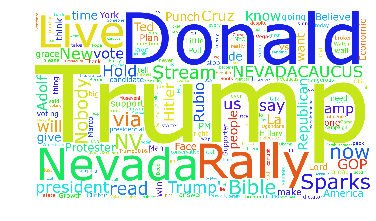

In [68]:

text = " ".join(tweets['text'].values.astype(str))
text_without_garbage = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wc = WordCloud(background_color='white',font_path="/Library/Fonts/Verdana.ttf", 
               stopwords=STOPWORDS, width=1920, height=1080)

wc.generate(text_without_garbage)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [69]:
tweets[tweets['lang'] == 'es']

,text,lang,country,created_at,geo,source
created_at,,,,,,
2016-02-23 03:38:47-05:00,"Marco Rubio, Hillary Clinton y Donald Trump so...",es,None,2016-02-23 20:38:47,None,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."
2016-02-23 03:38:59-05:00,"RT @EnriquePocacosa: Como Donald Trump,Peñalos...",es,None,2016-02-23 20:38:59,None,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."
2016-02-23 03:39:16-05:00,Noticias El vídeo del hombre travestido de Sai...,es,None,2016-02-23 20:39:16,None,"<a href=""http://twitterfeed.com"" rel=""nofollow..."
2016-02-23 03:39:21-05:00,El vídeo del hombre travestido de Sailor Moon ...,es,None,2016-02-23 20:39:21,None,"<a href=""http://twitterfeed.com"" rel=""nofollow..."
2016-02-23 03:39:21-05:00,El vídeo del hombre travestido de Sailor Moon ...,es,None,2016-02-23 20:39:21,None,"<a href=""http://twitterfeed.com"" rel=""nofollow..."
2016-02-23 03:39:21-05:00,El vídeo del hombre travestido de Sailor Moon ...,es,None,2016-02-23 20:39:21,None,"<a href=""http://twitterfeed.com"" rel=""nofollow..."
2016-02-23 03:39:21-05:00,El vídeo del hombre travestido de Sailor Moon ...,es,None,2016-02-23 20:39:21,None,"<a href=""http://twitterfeed.com"" rel=""nofollow..."
2016-02-23 03:39:21-05:00,El vídeo del hombre travestido de Sailor Moon ...,es,None,2016-02-23 20:39:21,None,"<a href=""http://twitterfeed.com"" rel=""nofollow..."
2016-02-23 03:39:50-05:00,El gran pedo con Donald Trump es siquiera imag...,es,None,2016-02-23 20:39:50,None,"<a href=""http://twitter.com/download/iphone"" r..."


In [70]:
print "Average tweets per minute: " + str(tweets1m.mean())[:5] + ", max was " + str(tweets1m.max())

Average tweets per minute: 178.5, max was 266


In [71]:
print tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                                3847
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                                                                                                3204
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                                                                                              2160
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                                                                                                  574
<a href="http://twitterfeed.com" rel="nofollow">twitterfeed</a>                                                                                                                    427
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>  

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


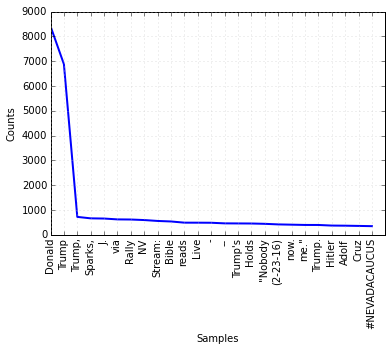

In [83]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
stop = stopwords.words('english')
text = tweets['text']

stop.append(['rt','via','-','_'])


freqdist = nltk.FreqDist([t for t in text_without_garbage.split() if t.lower() not in stop])
freqdist.plot(25)

In [91]:
retweets = tweets[tweets['text'].str.contains("RT")]
retweets.text.value_counts()

RT @TeamTrumpAZ: Live Stream: Donald Trump Holds Rally in Sparks, NV (2-23-16) https://t.co/bl2U0CQik9   #NEVADACAUCUS #NEVADA#Trump https:…        300
RT @gregorykorte: "Nobody reads the Bible more than me." -- Donald J. Trump, just now.                                                              291
RT @TheCWW: Adolf Hitler vs. Donald Trump https://t.co/iWWFkeYaGz                                                                                   218
RT @TooHighBros: The "I'm voting for Donald Trump starter pack" https://t.co/CMRALTy16j                                                             148
RT @ClassicPict: Donald Trump v Adolf Hitler https://t.co/TJBmi50MhX                                                                                132
RT @TheDailyShow: Ugandans answer the question: Donald Trump or their corrupt dictator Yoweri Museveni?\nhttps://t.co/txwFnozppj                    125
RT @SteveDeaceShow: Lord, have mercy. I know this megalomaniac is what we deserve, but g

In [115]:
donald_count = tweets[tweets['text'].str.lower().str.contains("trump")]['text'].count()
trump_count = tweets[tweets['text'].str.lower().str.contains("donald")]['text'].count()
print "Tweets surveyed: " + str(tweets['text'].count())
print "Tweets with 'Donald': " + str(donald_count)
print "Tweets with 'Trump': " + str(trump_count)
print "'Donald' to 'Trump' Ratio: " + str(donald_count/float(trump_count))[:4] + ":1"

Tweets surveyed: 12676
Tweets with 'Donald': 10364
Tweets with 'Trump': 9571
'Donald' to 'Trump' Ratio: 1.08:1
